In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [4]:
# Create dataframe from the given data
data = {
	't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
	'z_t': [80, 60, 30, 40, 70, 80, 70, 50, 40, 70]
}

df = pd.DataFrame(data)

In [5]:
df

,t,z_t
0,1,80
1,2,60
2,3,30
3,4,40
4,5,70
5,6,80
6,7,70
7,8,50
8,9,40
9,10,70


In [32]:
df['mean_z_t'] = df['z_t'].mean().astype(int)
df['z_t_bar'] = df['z_t'] - df['mean_z_t'].astype(int)
df['z_t_bar-1'] = df['z_t_bar'].shift(1)
df['forecast_z_t_bar']= (df['z_t_bar-1']*0.6)
df['at']=df['z_t_bar'] - df['forecast_z_t_bar']
df['at^2']=df['at']**2
df['at_abs']=abs(df['at'])
df['sum_at^2']=df['at^2'].sum()
df['at_abs/z_t']=df['at_abs']/df['z_t']
df['RMSE']=np.sqrt(df['sum_at^2']/(len(df)-2))
df['MAPE']=(df['at_abs']/df['z_t']).mean()*100



In [33]:
df

,t,z_t,mean_z_t,z_t_bar,z_t_bar-1,forecast_z_t_bar,at,at^2,at_abs,sum_at^2,at_abs/z_t,RMSE,MAPE
0,1,80,59,21,NaN,NaN,NaN,NaN,NaN,2655.04,NaN,18.217574,30.165079
1,2,60,59,1,21.0,12.6,-11.6,134.56,11.6,2655.04,0.193333,18.217574,30.165079
2,3,30,59,-29,1.0,0.6,-29.6,876.16,29.6,2655.04,0.986667,18.217574,30.165079
3,4,40,59,-19,-29.0,-17.4,-1.6,2.56,1.6,2655.04,0.040000,18.217574,30.165079
4,5,70,59,11,-19.0,-11.4,22.4,501.76,22.4,2655.04,0.320000,18.217574,30.165079
5,6,80,59,21,11.0,6.6,14.4,207.36,14.4,2655.04,0.180000,18.217574,30.165079
6,7,70,59,11,21.0,12.6,-1.6,2.56,1.6,2655.04,0.022857,18.217574,30.165079
7,8,50,59,-9,11.0,6.6,-15.6,243.36,15.6,2655.04,0.312000,18.217574,30.165079
8,9,40,59,-19,-9.0,-5.4,-13.6,184.96,13.6,2655.04,0.340000,18.217574,30.165079
9,10,70,59,11,-19.0,-11.4,22.4,501.76,22.4,2655.04,0.320000,18.217574,30.165079


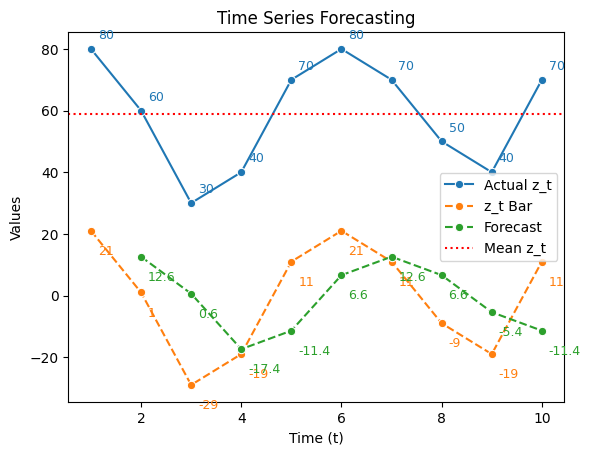

In [29]:
sns.lineplot(data=df, x='t', y='z_t', marker='o', label='Actual z_t')
sns.lineplot(data=df, x='t', y='z_t_bar', marker='o', label='z_t Bar', linestyle='--')
sns.lineplot(data=df, x='t', y='forecast_z_t_bar', marker='o', label='Forecast', linestyle='--')
plt.axhline(y=df['mean_z_t'][0], color='r', linestyle=':', label='Mean z_t')
plt.title('Time Series Forecasting')
plt.xlabel('Time (t)')
plt.ylabel('Values')


# label each actual point
for _, row in df.iterrows():
    plt.annotate(f'{int(row["z_t"])}', (row['t'], row['z_t']),
                 textcoords='offset points', xytext=(5, 5),
                 ha='left', va='bottom', fontsize=9, color='tab:blue')
    
# label each z_t_bar point
for _, row in df.iterrows():
    plt.annotate(f'{int(row["z_t_bar"])}', (row['t'], row['z_t_bar']),
                 textcoords='offset points', xytext=(5, -10),
                 ha='left', va='top', fontsize=9, color='tab:orange')

# label each forecast point
for _, row in df.iterrows():
    plt.annotate(f'{row["forecast_z_t_bar"]:.1f}', (row['t'], row['forecast_z_t_bar']),
                 textcoords='offset points', xytext=(5, -10),
                 ha='left', va='top', fontsize=9, color='tab:green')
plt.legend()
plt.show()